# 实验二：回归模型
- 姓名：吴静
- 学号：2113285
- 班级：信息安全二班


## 实验要求

### 基本要求：
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
- 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
- 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

### 中级要求：
探究回归模型在机器学习和统计学上的差异。

### 提高要求：
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

### 导入需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error

### 导入数据集winequality-white.csv

In [2]:
# 读取CSV文件
data = pd.read_csv("winequality-white.csv")

### 对数据进行预处理——中心化

In [3]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

In [4]:
# 回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
X = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)

划分数据集和测试集

In [5]:
#划分数据集和测试集，test_size是测试集的比例
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(x_train)

       x0  fixed acidity  volatile acidity  citric acid  residual sugar  \
4665  1.0       0.042809         -0.106119     0.015547        0.027739   
1943  1.0      -0.053345         -0.027687     0.063740        0.079886   
3399  1.0      -0.120653          0.040940    -0.002525        0.015469   
843   1.0       0.004347         -0.086511     0.009523       -0.071954   
2580  1.0       0.081270          0.021332    -0.044694        0.192616   
...   ...            ...               ...          ...             ...   
4426  1.0      -0.062960         -0.066903     0.111933        0.001665   
466   1.0       0.013963         -0.135531    -0.008549        0.040009   
3092  1.0       0.071655         -0.008080     0.111933       -0.048948   
3772  1.0      -0.053345         -0.037491    -0.026621        0.112095   
860   1.0       0.119732         -0.008080     0.009523       -0.071954   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
4665  -0.052737            

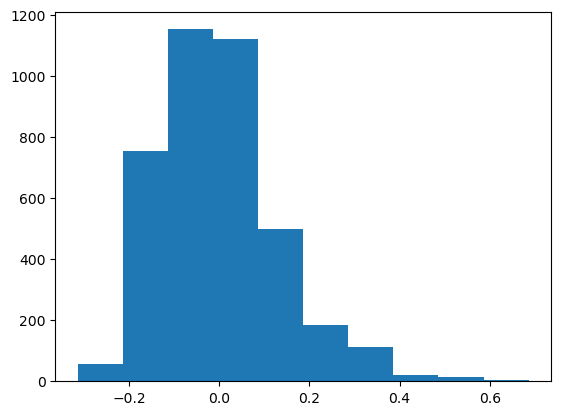

In [6]:
# 可视化中心化后的sulphates特征
plt.hist(x_train["sulphates"])
plt.show()

### 梯度下降法

梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。

它计算误差函数关于参数向量的局部梯度，同时沿着梯度下降的方向进行下一次迭代，当梯度值为零的时候，就达到了误差函数最小值。

具体来说，开始时，需要选定一个随机初始值，然后逐渐去改进它，每一步都试着降低损失函数，比如本实验中选取的均方差损失函数，直到算法收敛到一个最小值。

在梯度下降中一个重要的参数是步长，超参数学习率的值决定了步长的大小。
- 如果学习率太小，必须经过多次迭代，算法才能收敛。
- 如果学习率太大，将跳过最低点，可能下一次的值比上一次还要大。这可能使的算法是发散的，函数值变得越来越大

线性回归模型的均方差损失函数是一个凸函数，所以选择曲线上的任意两点，它们的连线段不会与曲线发生交叉。所以这个损失函数没有局部最小值，仅仅只有一个全局最小值。

同时它也是一个斜率不能突变的连续函数。

所以我们可以知道：梯度下降可以无限接近全局最小值。

### 批量梯度下降

***在每次迭代中使用整个训练数据集来更新模型参数***

梯度公式：
   $$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)}$$
   
梯度矩阵的表达式如下：

$$\nabla J(\theta) = \frac{1}{m} X^T(y - X\theta)$$

   其中：
   - $\nabla J(\theta)$ 表示梯度向量（矩阵）。
   - $m$ 表示训练样本的数量。
   - $\hat{y}^{(i)}$ 表示模型对第 $i$ 个样本的预测值。
   - $y^{(i)}$ 表示第 $i$ 个样本的实际目标值。
   - $x^{(i)}$ 表示第 $i$ 个样本的特征向量。
   - $X^T$ 表示特征矩阵 $X$ 的转置。
   - $(y - X\theta )$ 表示实际目标值与模型的预测值之间的差。

 模型参数 $\theta$：
 
 $$\theta = \theta + \alpha \nabla J(\theta)$$
 
   其中：
   - $\alpha$ 是学习率（learning rate），用于控制参数更新的步长。

优点：
- 利用矩阵进行运算，实现了并行
- 一定能够得到全局最优解

缺点：
训练过程很慢，花费很长的时间

In [7]:
def Batch_Gradient_Descent(x_train,x_test,eta):
    MSE_arr=[]
    
    np.random.seed(42)
    #设置NumPy随机数生成器的种子为42
    #种子意味着每次运行代码时，通过np.random.randn等函数生成的随机数都将是相同的
    
    #转化为np数组
    x_train=np.array(x_train)
    x_test=np.array(x_test)
    
    theta = np.random.randn(len(x_train[0]))
    #初始化theta，参数的数量等于特征的数量
    
    sample_num=len(x_train)
    for i in range(1000):
        #x_train是3918*12矩阵，转置之后是12*3918矩阵，y_train是3918*1矩阵
        #x_train.dot(theta)后是3918*1矩阵
        #最后矩阵乘法结束后得到12*1矩阵
        gradients = 1/sample_num * x_train.T.dot(y_train - x_train.dot(theta))
        theta=theta+eta*gradients
        
        #x_train是980*12矩阵，dot后是980*1矩阵，y_test是980*1矩阵
        #mean函数为取平均值
        MSE=((np.dot(x_test,theta)-y_test)**2).mean()
        MSE_arr.append(MSE)
    #print(MSE_arr)
    return MSE_arr

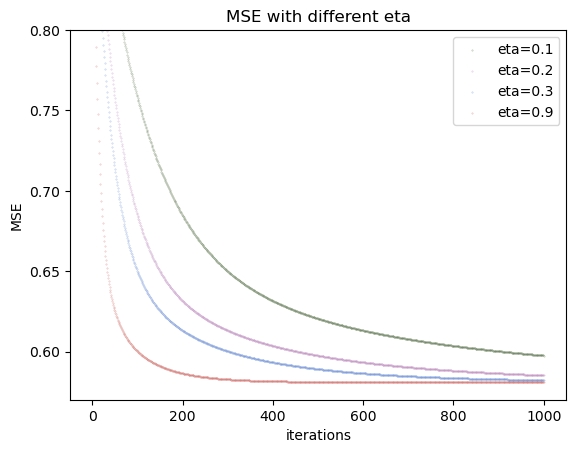

In [8]:
MSE_arr0=Batch_Gradient_Descent(x_train,x_test,eta=0.1)
MSE_arr1=Batch_Gradient_Descent(x_train,x_test,eta=0.2)
MSE_arr2=Batch_Gradient_Descent(x_train,x_test,eta=0.3)
MSE_arr3=Batch_Gradient_Descent(x_train,x_test,eta=0.9)
iterations = range(1, len(MSE_arr0) + 1)
plt.scatter(iterations, MSE_arr0,s=0.1, alpha=0.5,color='#577149', marker='o', label='eta=0.1')
plt.scatter(iterations, MSE_arr1,s=0.1,alpha=0.5, color='#BB85BC', marker='o', label='eta=0.2')
plt.scatter(iterations, MSE_arr2,s=0.1,alpha=0.5, color='#688BD5', marker='o', label='eta=0.3')
plt.scatter(iterations, MSE_arr3,s=0.1,alpha=0.5, color='#CF6862', marker='o', label='eta=0.9')

plt.ylim(0.57,0.8)

#添加标题和标签
plt.xlabel("iterations")
plt.ylabel("MSE")
plt.title("MSE with different eta")

#添加图例
plt.legend()

#显示散点图
plt.show()
#print(MSE_arr2)

可以看出，随着eta（学习率）的上升，模型回归的速度越来越快（迭代次数越来越少），但是我们注意到，eta=0.9时，随着模型迭代次数上升，MSE有着一定上升，说明这个模型存在一定发散问题，所以对应这个模型来讲，最佳的eta应该是0.3到0.5之间。

### 随机梯度下降

***在每次迭代中只使用一个样本来更新参数***

梯度公式：
   $$\nabla J(\theta) = (\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$


 模型参数 $\theta$：
 
 $$\theta = \theta - \alpha \nabla J(\theta)$$

优点：
速度快

缺点：
- 准确度下降
- 可能会收敛到局部最优
- 不易于并行实现

In [9]:
def Stochastic_Gradient_Descent(x_train, x_test, y_train, y_test, eta, num_epochs):
    # 转化为np数组
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    sample_num = len(x_train)
    
    # 初始化模型参数,theta为12*1
    theta = np.random.randn(len(x_train[0]))
    
    MSE_arr = []
    
    for i in range(num_epochs):
        MSE_sum = 0.0
        for j in range(sample_num):
            # 随机选择一个作为训练样本,xi,yi是1*12矩阵（向量）
            random_index = np.random.randint(sample_num)
            xi = x_train[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]
            
            # 计算模型的预测值,y_predict是一个值
            y_predict = xi.dot(theta)
            
            # 计算梯度
            gradients = xi.T.dot(y_predict-yi)
            
            # 使用梯度更新模型参数
            theta = theta - eta * gradients
            
            # 在测试集上计算预测值
            y_test_predict = x_test.dot(theta)
            
            # 计算每一次的MSE
            MSE = ((y_test_predict - y_test) ** 2)/(2*sample_num)
            
            # 累计MSE
            MSE_sum += MSE
        #print(type(MSE_sum))
        #print(MSE_sum)
        MSE_arr.append(MSE_sum.mean())
    return MSE_arr

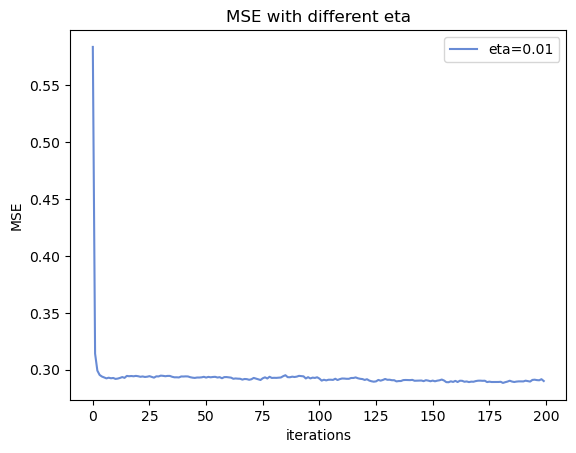

In [10]:
MSE_arr4=Stochastic_Gradient_Descent(x_train, x_test, y_train, y_test, eta=0.01, num_epochs=200)

#添加图例
plt.plot(np.arange(len(MSE_arr4)),MSE_arr4,color='#688BD5',label='eta=0.01')

#添加标题和标签
plt.xlabel("iterations")
plt.ylabel("MSE")
plt.title("MSE with different eta")

plt.legend()

#显示散点图
plt.show()

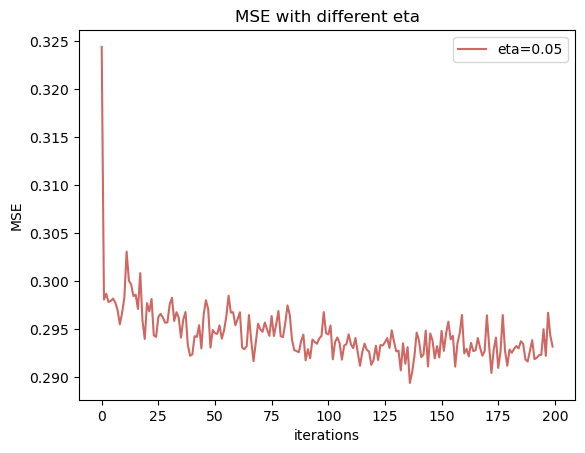

In [11]:
MSE_arr5=Stochastic_Gradient_Descent(x_train, x_test, y_train, y_test, eta=0.05, num_epochs=200)

#添加图例
plt.plot(np.arange(len(MSE_arr5)),MSE_arr5,color='#CF6862',label='eta=0.05')

#添加标题和标签
plt.xlabel("iterations")
plt.ylabel("MSE")
plt.title("MSE with different eta")

plt.legend()

#显示散点图
plt.show()

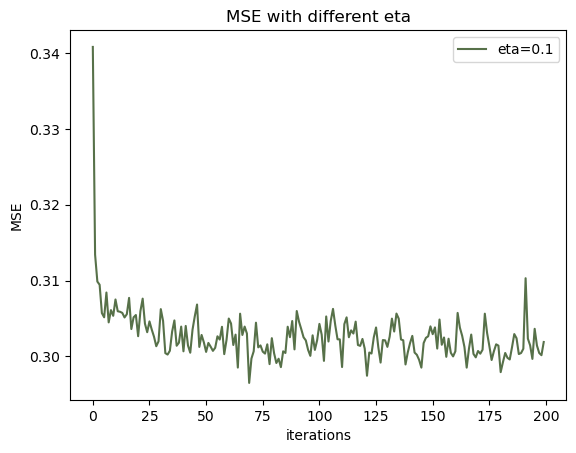

In [12]:
MSE_arr6=Stochastic_Gradient_Descent(x_train, x_test, y_train, y_test, eta=0.1, num_epochs=200)

#添加图例
plt.plot(np.arange(len(MSE_arr6)),MSE_arr6,color='#577149',label='eta=0.1')

#添加标题和标签
plt.xlabel("iterations")
plt.ylabel("MSE")
plt.title("MSE with different eta")

plt.legend()

#显示散点图
plt.show()

首先我么可以看到，随机梯度下降法的曲线比批量梯度下降法的曲线更不稳定，随着迭代次数的增加，在一个水平线附近。

这是由于它的随机性，他呈现出更多的不规律性：到达最小值不是平缓的下降，损失函数MSE忽高忽低，只是在大体上呈下降趋势。随着时间的推移，它会非常的靠近最小值，但是它不会停止在一个值上，它会一直在这个值附近摆动。因此，当算法停止的时候，最后的参数还不错，但不是最优值。

于是这里有一个和批量梯度下降法很不同的点在于，我们可以通过逐步降低学习率使算法达到全局最小值。即开始时，走的每一步较大，这有助于快速前进同时跳过局部最小值，然后变得越来越小，从而使算法到达全局最小值，但是本题中我们直接使学习率降低，升高迭代次数以达到相同的效果。

通过上面几个不同学习率下MSE的图，我们可以看出，随着eta的增加，模型逐渐趋于不稳定，说明此时eta偏大，有可能已经跳过了全局最小值，所以在eta=0.1的时候，模型训练的最好（eta可以更低），最后的数据最为稳定。

### 损失函数MSE：
  $$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$

### 回归模型在机器学习和统计学上的差异

**机器学习和统计学习之间的区别主要是目的。机器学习是为了预测，统计学习是为了探究变量之间的关系以及确定关系的显著性。**

机器学习中将数据分成两个部分，一个是训练集，一个是测试集，通过在训练集上进行训练，得到一个模型，最后用另一个数据集进行该模型好坏的划分，他的最终目的是要在测试集上获得好的性能，可以获得一个可以反复预测的模型，尤其是在输入因素非常多，关系非常复杂的情况下，通常不要求它能告诉我们变量之间的关系，只要能够准确地预测结果就好了。

在统计学中，不需要用到训练集测试集，他的目的是想要找到变量之间的关系，通过置信区间、显著性检验等方法确定关系的显著性。

***总结来说，机器学习是为了对未来的数据进行预测；而统计学习是为了刻画数据与结果变量之间的关系。***

#### 岭回归

公式$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$不可逆原因:

- 矩阵可逆的充要条件：满秩；
- 存在噪声维，使得特征间存在线性关系，导致矩阵的秩小于特征维度；
- 特征数比样本还多的时候，方程的个数比未知数的个数还要少，所以会导致矩阵的秩小于样本数,无穷多解满足该情况，进而矩阵不可逆。

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$
当岭参数$\lambda$时，得到最小二乘解，当岭参数$\lambda$趋向更大时，岭回归系数 $\pmb{\theta}$ 估计趋向于0。
从岭回归的原理可以知道，岭回归就是改良后的最小二乘估计法，通过放弃最小二乘法的无偏性，通过损失部分特征信息，降低模型精度来得到更符合实际情况的回归系数。

 模型参数 $\theta$：
 $$ \boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y} $$

其中：
- $\boldsymbol{\theta}$：是岭回归的参数向量，用于构建线性回归模型。
- $\mathbf{X}$：是包含训练样本的特征值的特征矩阵，维度为 $m \times n$，其中 $m$ 是样本数量，$n$ 是特征数量。
- $\mathbf{y}$：是包含训练样本的实际目标值的目标向量，维度为 $m \times 1$。
- $\lambda$：是岭回归的正则化参数，是一个超参数，用于控制正则化的强度。
- $\mathbf{I}$：是单位矩阵，维度与特征数量 \(n\) 相同。


此时选择直接求解析解的方法：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$$
   - 优点：不需要试错，可以直接取得最小值，比较快捷。

   - 缺点：当特征过于复杂时，无法求逆。

   - 适用于：小数据场景。（梯度下降相对用的更多一些）

In [13]:
# 岭回归的解析法（使用矩阵运算）
def ridge_regression(X, y, alpha):
    #x表示特征矩阵
    #y表示目标矩阵（标签）
    
    n, m = X.shape
    #n表示行数（样本数量）
    #m标识列数（特征）
    
    I = np.identity(m)
    #创建了一个m*m的单位矩阵
    
    theta = np.linalg.inv(X.T.dot(X) + alpha * I).dot(X.T).dot(y)
    #np.linalg.inv(): 计算新矩阵的逆矩阵
    
    return theta

In [14]:
# 计算岭回归模型的theta
theta_analytical = ridge_regression(x_train, y_train, alpha=1.0)

In [15]:
# 在训练集上计算训练误差
y_train_predict = x_train.dot(theta_analytical)
train_error=1/2*((y_train_predict-y_train)**2).mean()
#train_error = mean_squared_error(y_train, y_train_predict)
#mean_squared_error是计算MSE的函数

In [16]:
# 在测试集上计算测试误差
y_test_predict = x_test.dot(theta_analytical)
test_error=1/2*((y_test_predict-y_test)**2).mean()
#test_error = mean_squared_error(y_test, y_test_predict)

In [17]:
print("解析法训练误差:", train_error)
print("解析法测试误差:", test_error)

解析法训练误差: 0.2829494436506957
解析法测试误差: 0.28861786113551186
